In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
from matplotlib import pyplot as plt
import numpy as np

In [4]:
IMG_HEIGHT=48 
IMG_WIDTH = 48
batch_size=32

In [5]:
train_data_dir='data/train/'
validation_data_dir='data/test/'

In [6]:
train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					horizontal_flip=True,
					fill_mode='nearest')

In [7]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(IMG_HEIGHT, IMG_WIDTH),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(IMG_HEIGHT, IMG_WIDTH),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [9]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

In [10]:
img, label = train_generator.__next__()

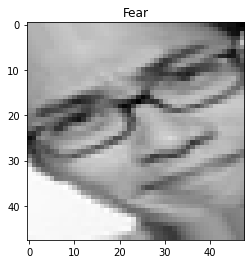

In [52]:
import random

i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image, cmap='gray')
plt.title(labl)
plt.show()

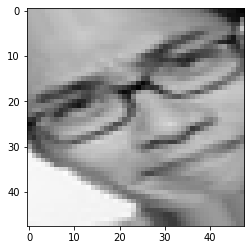

In [53]:
import cv2
color_image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
plt.imshow(color_image)
plt.show()

In [27]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

In [28]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [29]:
train_path = "data/train/"
test_path = "data/test"

In [30]:
num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)
    
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

In [34]:
epochs=30

In [35]:
history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//batch_size,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//batch_size)

Epoch 1/30
897/897 [==============================] - 236s 264ms/step - loss: 1.3842 - accuracy: 0.4659 - val_loss: 1.2732 - val_accuracy: 0.5126
Epoch 2/30
897/897 [==============================] - 235s 261ms/step - loss: 1.3435 - accuracy: 0.4838 - val_loss: 1.2132 - val_accuracy: 0.5361
Epoch 3/30
897/897 [==============================] - 229s 255ms/step - loss: 1.3176 - accuracy: 0.4970 - val_loss: 1.1862 - val_accuracy: 0.5430
Epoch 4/30
897/897 [==============================] - 229s 255ms/step - loss: 1.2929 - accuracy: 0.5065 - val_loss: 1.1691 - val_accuracy: 0.5559
Epoch 5/30
897/897 [==============================] - 229s 255ms/step - loss: 1.2744 - accuracy: 0.5124 - val_loss: 1.1679 - val_accuracy: 0.5557
Epoch 6/30
897/897 [==============================] - 229s 255ms/step - loss: 1.2641 - accuracy: 0.5171 - val_loss: 1.1300 - val_accuracy: 0.5678
Epoch 7/30
897/897 [==============================] - 229s 255ms/step - loss: 1.2489 - accuracy: 0.5256 - val_loss: 1.1571 -

In [36]:
model.save('emotion_detection_model.h5')

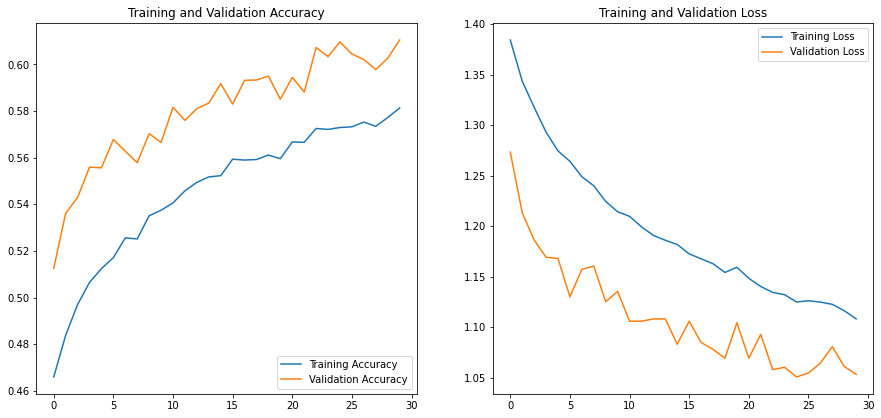

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [40]:
import pathlib
rohit_dataset_dir = "dataset/rohit"
rohit_dataset_dir = pathlib.Path(rohit_dataset_dir)

In [41]:
rohit_images = list(rohit_dataset_dir.glob('*'))
rohit_images

[WindowsPath('dataset/rohit/a1.jpeg'),
 WindowsPath('dataset/rohit/a2.jpeg'),
 WindowsPath('dataset/rohit/a3.jpeg'),
 WindowsPath('dataset/rohit/a4.jpeg'),
 WindowsPath('dataset/rohit/b1.jpeg'),
 WindowsPath('dataset/rohit/r1.jpeg'),
 WindowsPath('dataset/rohit/r2.jpeg'),
 WindowsPath('dataset/rohit/r3.jpeg'),
 WindowsPath('dataset/rohit/r4.png'),
 WindowsPath('dataset/rohit/r5.jpg'),
 WindowsPath('dataset/rohit/r6.png'),
 WindowsPath('dataset/rohit/r7.jpg'),
 WindowsPath('dataset/rohit/r8.jpeg')]

In [42]:
import cv2
X_rohit = []

for image in rohit_images:
    img = cv2.imread(str(image))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(img,(48,48))
    X_rohit.append(resized_img)


In [43]:
X_rohit = np.array(X_rohit)
X_rohit = X_rohit / 255.0

In [44]:
predictions = model.predict(X_rohit)

1/1 [==============================] - 1s 517ms/step


In [64]:
val = 1

In [65]:
rohit_pred_index = np.argmax(predictions[val])